# Step5b: Perturbation Simulation

## Dependencies

In [1]:
#%pip install velocyto

In [2]:
import mudata
import os
import scanpy as sc
import anndata
import matplotlib
import matplotlib.pyplot as plt
import adjustText
import numpy as np
import pandas as pd
import sys

In [3]:
from scenicplus.simulation import (
    train_gene_expression_models,
    simulate_perturbation,
    plot_perturbation_effect_in_embedding
)

2024-11-14 17:52:33,757	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [4]:
# Determine the folder in which the code is executed
WORKING_DIR = os.getcwd()
sys.path.append(os.path.abspath( WORKING_DIR))

# Run the params codes
%run -i ../../globalParams.py #GlobalParams
%run -i ../../sampleParams.py #sampleParams
%run -i ./analysisParams.py #AnalysisParams

In [5]:
%matplotlib inline

In [6]:
scplus_mdata = mudata.read(os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/scplusmdata.h5mu"))

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  w

In [7]:
scplus_mdata

MuData object with n_obs × n_vars = 28815 × 310359
  uns:	'direct_e_regulon_metadata', 'extended_e_regulon_metadata'
  6 modalities
    scRNA_counts:	28815 x 36601
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'ENTPD1_cl', 'TR', 'ITGAE_ITGA1', 'KIT_AFF3', 'stage', 'histo', 'detailed_stage', 'Donor_histo', 'Donor_stage', 'RNA_snn_res.0', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'Fine_Clustering_RNA', 'Coarse_Clustering_RNA', 'Fine_Annotation_RNA', 'Course_Annotation_RNA', 'Coarse_Annotation_RNA', 'peaks_snn_res.0', 'peaks_snn_res.0.1', 'peaks_snn_res.0.2', 'peaks_snn_res.0.3', 'peaks_snn_res.0.4', 'peaks_snn_res.0.5', 'peaks_snn_res.0.6', 'peaks_snn_res.0.7', 'peaks_snn_res.0.8', 'peaks_snn_res.0.9', 'peaks_snn_res.1', 'RNA.weight', 'wsnn_res.0', 'wsnn_res.0.1', 'wsnn_res.0.2', 'wsnn_res.0.3', 'wsnn_res.0.4', 'wsnn_res.0.5', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.0.2_1', 'wsnn_res.0.4_1', 'Fine_Annotation_WNN', 'peaks_snn_res.0.3_1', 'Annotation_Peaks_RNA', 'Annotation_Peaks_GA', 'Coarse_Annotation_WNN', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_pca', 'X_umap'
    scATAC_counts:	28815 x 273300
      obs:	'pdf_values_for_tss_enrichment', 'barcode_rank', 'total_fragments_count', 'cisTopic_nr_frag', 'duplication_count', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_unique_fragments_count', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'tss_enrichment', 'unique_fragments_count', 'fraction_of_fragments_in_peaks', 'total_fragments_in_peaks_count', 'log10_total_fragments_count', 'log10_unique_fragments_in_peaks_count', 'cisTopic_nr_acc', 'duplication_ratio', 'unique_fragments_in_peaks_count', 'cisTopic_log_nr_frag', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity'

In [8]:
eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
    axis = 1,
)
eRegulon_gene_AUC.obs = scplus_mdata.obs


In [9]:
eRegulon_gene_AUC

AnnData object with n_obs × n_vars = 28815 × 229
    obs: 'scRNA_counts:orig.ident', 'scRNA_counts:nCount_RNA', 'scRNA_counts:nFeature_RNA', 'scRNA_counts:nCount_ATAC', 'scRNA_counts:nFeature_ATAC', 'scRNA_counts:cell_type', 'scRNA_counts:sex', 'scRNA_counts:smoker', 'scRNA_counts:sample', 'scRNA_counts:nCount_peaks', 'scRNA_counts:nFeature_peaks', 'scRNA_counts:fragments', 'scRNA_counts:FRiP', 'scRNA_counts:blacklist_fraction', 'scRNA_counts:nucleosome_signal', 'scRNA_counts:nucleosome_percentile', 'scRNA_counts:TSS.enrichment', 'scRNA_counts:TSS.percentile', 'scRNA_counts:nucleosome_group', 'scRNA_counts:high.tss', 'scRNA_counts:percent.rb', 'scRNA_counts:percent.mt', 'scRNA_counts:percent.HSP', 'scRNA_counts:S.Score', 'scRNA_counts:G2M.Score', 'scRNA_counts:Phase', 'scRNA_counts:pct_chrY', 'scRNA_counts:nCount_SCT', 'scRNA_counts:nFeature_SCT', 'scRNA_counts:integrated.weight', 'scRNA_counts:peaks.weight', 'scRNA_counts:seurat_clusters', 'scRNA_counts:NK_sig_UCell', 'scRNA_counts:NK

## PCA Visualization

In [10]:
sc.pp.pca(eRegulon_gene_AUC)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_FGFBP2': '#1f77b4', 'NK_CAMK4': '#ff7f0e', 'ILC3': '#2ca02c', 'ILC1': '#d62728', 'NK1_CCL4': '#9467bd', 'NK_GZMK': '#8c564b', 'NK2_XCL1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'NK_NFKB1': '#bcbd22', 'NK_DNAJB1': '#17becf', 'NK_MKI67': '#17becf'}


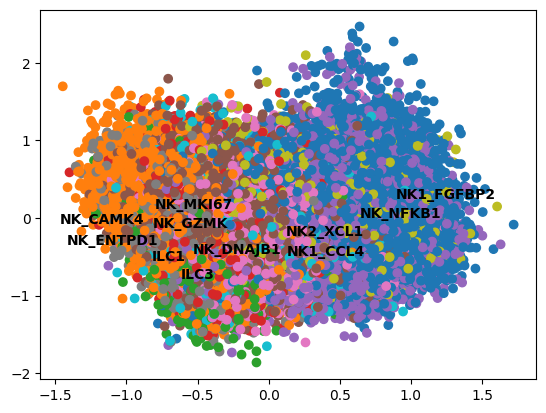

In [12]:
def plot_mm_line_pca(ax):
    texts = []
    # Plot PCA
    ax.scatter(
        eRegulon_gene_AUC.obsm["X_pca"][:, 0],
        eRegulon_gene_AUC.obsm["X_pca"][:, 1],
        color = [color_dict_line[line] for line in eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]]
    )
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]):
        line_bc_idc = np.arange(len(eRegulon_gene_AUC.obs_names))[eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME] == line]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_pca"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight = "bold"
            )
        )
    adjustText.adjust_text(texts)

fig, ax = plt.subplots()
plot_mm_line_pca(ax)

In [13]:
gene_tf_direct_extended = pd.concat(
    [
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()
gene_to_TF = gene_tf_direct_extended.groupby("Gene")["TF"].apply(lambda tfs: list(tfs)).to_dict()

## UMAP Visualization

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


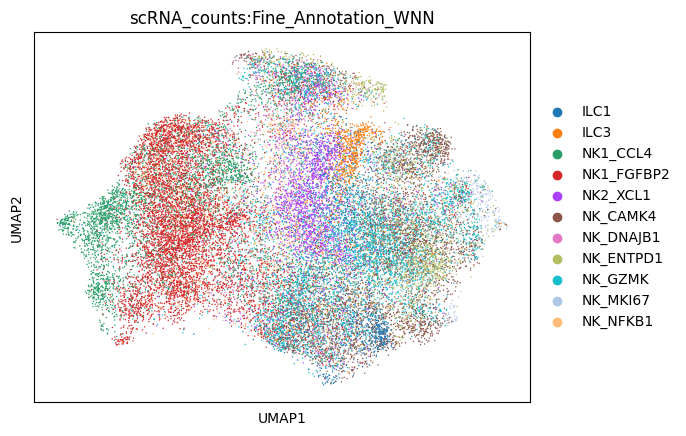

In [14]:
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")
sc.tl.umap(eRegulon_gene_AUC)
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_FGFBP2': '#1f77b4', 'NK_CAMK4': '#ff7f0e', 'ILC3': '#2ca02c', 'ILC1': '#d62728', 'NK1_CCL4': '#9467bd', 'NK_GZMK': '#8c564b', 'NK2_XCL1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'NK_NFKB1': '#bcbd22', 'NK_DNAJB1': '#17becf', 'NK_MKI67': '#17becf'}


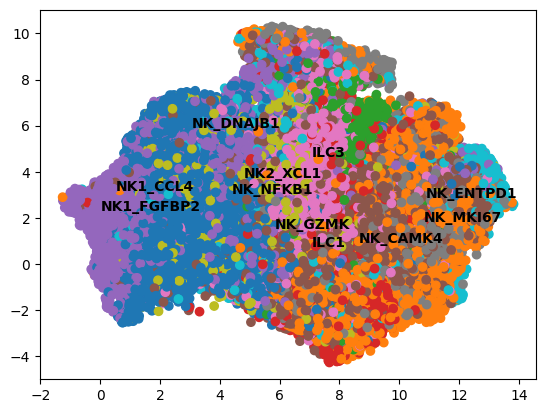

In [16]:
def plot_mm_line_umap(ax):
    texts = []
    # Plot UMAP
    ax.scatter(
        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
        color = [color_dict_line[line] for line in eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]]
    )
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]):
        line_bc_idc = np.arange(len(eRegulon_gene_AUC.obs_names))[eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME] == line]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight = "bold"
            )
        )
    adjustText.adjust_text(texts)

fig, ax = plt.subplots()
plot_mm_line_umap(ax)

In [17]:
gene_tf_direct_extended = pd.concat(
    [
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()
gene_to_TF = gene_tf_direct_extended.groupby("Gene")["TF"].apply(lambda tfs: list(tfs)).to_dict()

## WNN_UMAP Visualization

In [18]:
TABLE_EMBEDDING_OF_INTEREST

'WNN_UMAP_TABLE.csv'

In [19]:
#Inject the WNN_UMAP values in place of UMAP
# Read the csv of the WNN_UMAP
WNN_UMAP_TABLE = pd.read_csv( os.path.join( PATH_EXPERIMENT_OUTPUT, ANALYSIS_04a0_STEP_NAME, "Embeddings",TABLE_EMBEDDING_OF_INTEREST))

# Step 1: Rename the first column of WNN_UMAP_TABLE to 'cell_names'
# Create a dictionary to map old column names to new ones
column_mapping = {
    WNN_UMAP_TABLE.columns[0]: 'cell_names',
    WNN_UMAP_TABLE.columns[1]: 'WNNUMAP_1',
    WNN_UMAP_TABLE.columns[2]: 'WNNUMAP_2'
}

# Rename the columns
WNN_UMAP_TABLE = WNN_UMAP_TABLE.rename(columns=column_mapping)

# Step 2: Modify the names in the 'cell_names' column to match the format in eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE['cell_names'] = WNN_UMAP_TABLE['cell_names'].apply(lambda x: '-'.join(x.split('_')[1:]) + '-' + x.split('_')[0] + '___' + x.split('_')[0])

# Step 3: Keep only rows where 'cell_names' in WNN_UMAP_TABLE match with eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE_filtered = WNN_UMAP_TABLE[WNN_UMAP_TABLE['cell_names'].isin(eRegulon_gene_AUC.obs_names)]

# Step 4: Reorder WNN_UMAP_TABLE_filtered to match the order of eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE_ordered = WNN_UMAP_TABLE_filtered.set_index('cell_names').reindex(eRegulon_gene_AUC.obs_names).reset_index()

# Check the reordered table
print(WNN_UMAP_TABLE_ordered)

                                  index  WNNUMAP_1  WNNUMAP_2
0      CAGGACCTCATGACCG-1-CSS27___CSS27  -0.034662   4.183527
1      ATTCCTAGTTGCATCT-1-CSS21___CSS21  -0.039433  -4.104122
2        TTAAGGACATTGTCAG-1-CSS1___CSS1   1.804987   3.254585
3      CTAGTAATCGTTAACA-1-CSS23___CSS23  -7.822613   0.108127
4      GAAGCCTGTTGTTGCT-1-CSS13___CSS13   3.425370  -2.276737
...                                 ...        ...        ...
28810    GGCCTCTGTCCTAGTT-1-CSS4___CSS4   2.897320  -2.807958
28811    AATTGGGAGTTAACCA-1-CSS4___CSS4  -3.935190   0.095180
28812  ATATGCTCAGCTAACC-1-CSS16___CSS16   1.559455  -4.087695
28813  TGCTGGATCCTTGCGT-1-CSS21___CSS21  -0.237351  -4.935708
28814  TTAAGCCAGCACTTGG-1-CSS21___CSS21   2.466285  -2.196022

[28815 rows x 3 columns]


In [20]:
#Inject the values of WNN_UMAP
# Step 1: Extract the 'WNNUMAP_1' and 'WNNUMAP_2' columns from WNN_UMAP_TABLE_ordered
wnn_umap_values = WNN_UMAP_TABLE_ordered[['WNNUMAP_1', 'WNNUMAP_2']].values

# Step 2: Inject these values into eRegulon_gene_AUC.obsm["X_umap"]
eRegulon_gene_AUC.obsm["X_umap"] = wnn_umap_values

# Step 3: Check that the values were successfully updated
print(eRegulon_gene_AUC.obsm["X_umap"])

[[-0.03466247  4.18352659]
 [-0.03943305 -4.10412185]
 [ 1.80498744  3.25458534]
 ...
 [ 1.55945493 -4.08769481]
 [-0.2373509  -4.93570845]
 [ 2.466285   -2.19602172]]


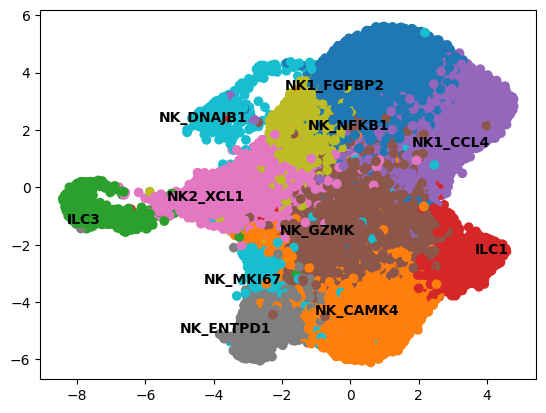

In [21]:
#Def the visualisation function
def plot_mm_line_umap(ax):
    texts = []
    # Plot UMAP
    ax.scatter(
        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
        color = [color_dict_line[line] for line in eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]]
    )
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]):
        line_bc_idc = np.arange(len(eRegulon_gene_AUC.obs_names))[eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME] == line]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight = "bold"
            )
        )
    adjustText.adjust_text(texts)
    
# Have a look at the figures
fig, ax = plt.subplots()
plot_mm_line_umap(ax)

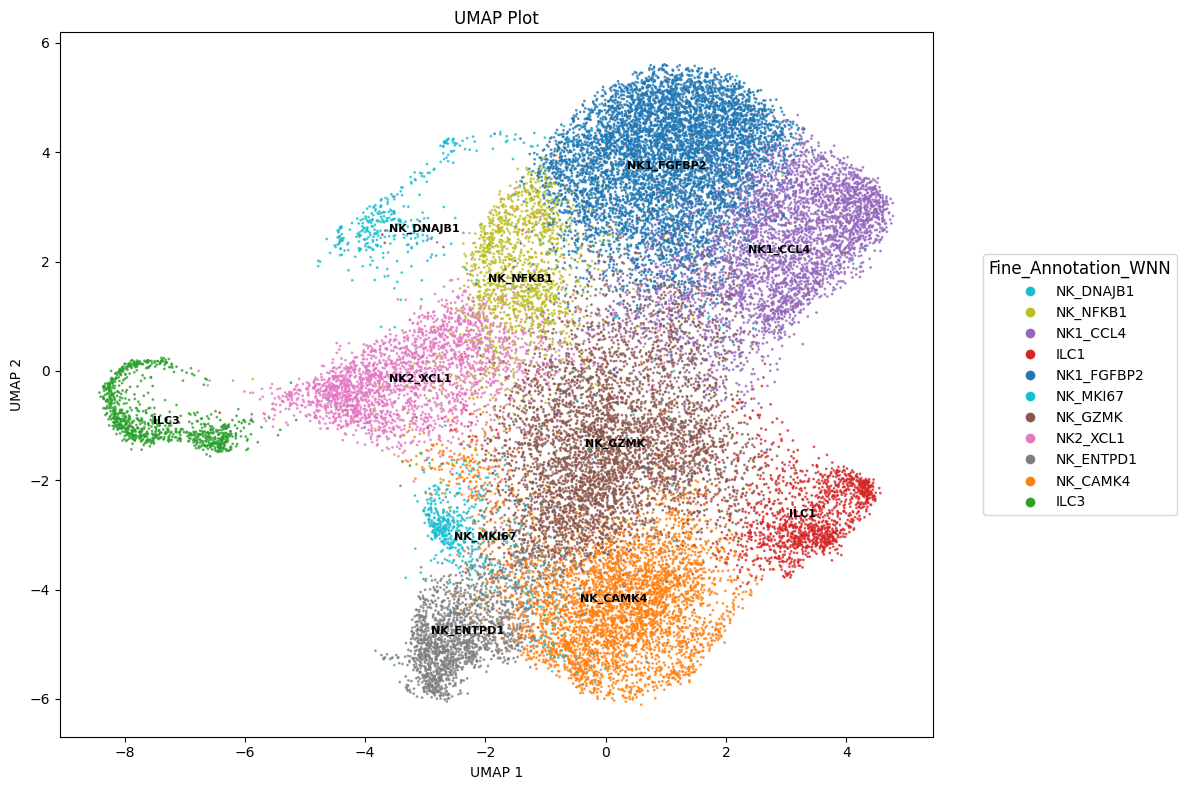

In [22]:
#Improved dataviz
def plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line, point_size=1, legend_loc='center left'):
    texts = []
    
    # Plot UMAP
    scatter = ax.scatter(
        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
        c=[color_dict_line[line] for line in eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]],
        s=point_size,  # Set point size
        alpha=0.7  # Add some transparency
    )
    
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]):
        line_bc_idc = np.where(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME] == line)[0]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight="bold",
                fontsize=8  # Adjust font size if needed
            )
        )
    
    # Adjust text labels to avoid overlap
    adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
    
    # Add legend
    unique_lines = list(set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]))
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=color_dict_line[line], markersize=8, label=line)
                       for line in unique_lines]
    ax.legend(handles=legend_elements, loc=legend_loc, bbox_to_anchor=(1.05, 0.5), 
              title=CELL_TYPE_COLNAME, title_fontsize='large')
    
    # Set labels and title
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_title('UMAP Plot')
    
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    return ax

# Usage
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)
plt.show()

In [23]:
color_dict_line

{'NK1_FGFBP2': '#1f77b4',
 'NK_CAMK4': '#ff7f0e',
 'ILC3': '#2ca02c',
 'ILC1': '#d62728',
 'NK1_CCL4': '#9467bd',
 'NK_GZMK': '#8c564b',
 'NK2_XCL1': '#e377c2',
 'NK_ENTPD1': '#7f7f7f',
 'NK_NFKB1': '#bcbd22',
 'NK_DNAJB1': '#17becf',
 'NK_MKI67': '#17becf'}

In [24]:
the_values_to_see = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])
print(the_values_to_see[5:11])

['NK_GZMK', 'NK2_XCL1', 'NK_ENTPD1', 'NK_NFKB1', 'NK_DNAJB1', 'NK_MKI67']
Categories (11, object): ['ILC1', 'ILC3', 'NK1_CCL4', 'NK1_FGFBP2', ..., 'NK_ENTPD1', 'NK_GZMK', 'NK_MKI67', 'NK_NFKB1']


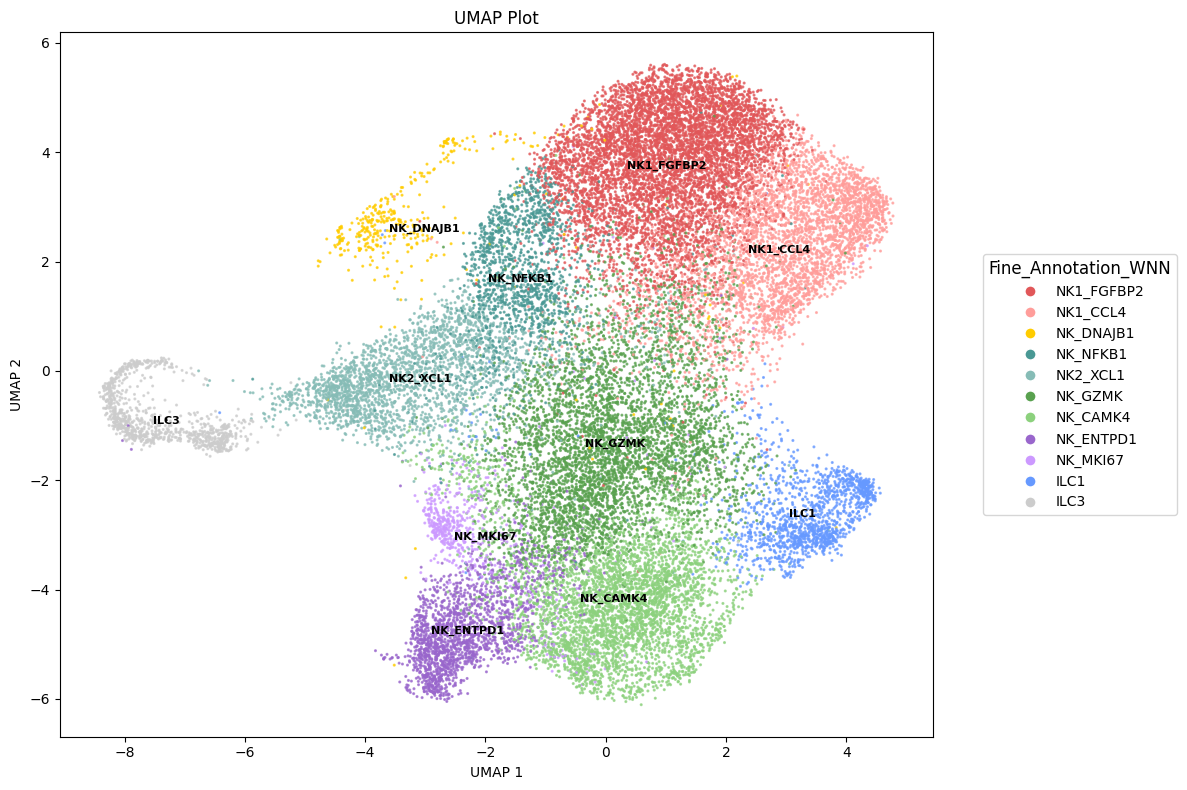

In [25]:
# Create color dictionary
color_dict_line = dict(zip(cluster_names, color_codes))

def plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line, point_size= 1.5, legend_loc='center left'):
    texts = []
    
    # Plot UMAP
    scatter = ax.scatter(
        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
        c=[color_dict_line.get(line, "#000000") for line in eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]],
        s=point_size,
        alpha=0.7
    )
    
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]):
        line_bc_idc = np.where(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME] == line)[0]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight="bold",
                fontsize=8
            )
        )
    
    # Adjust text labels to avoid overlap
    adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=color_dict_line[line], markersize=8, label=line)
                       for line in color_dict_line if line in set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])]
    ax.legend(handles=legend_elements, loc=legend_loc, bbox_to_anchor=(1.05, 0.5), 
              title=CELL_TYPE_COLNAME, title_fontsize='large')
    
    # Set labels and title
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_title('UMAP Plot')
    
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    return ax

# Usage
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_FGFBP2': '#1f77b4', 'NK_CAMK4': '#ff7f0e', 'ILC3': '#2ca02c', 'ILC1': '#d62728', 'NK1_CCL4': '#9467bd', 'NK_GZMK': '#8c564b', 'NK2_XCL1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'NK_NFKB1': '#bcbd22', 'NK_DNAJB1': '#17becf', 'NK_MKI67': '#17becf'}


In [27]:
#Old version

#def plot_mm_line_umap(ax):
#    texts = []
#    # Plot UMAP
#    ax.scatter(
#        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
#        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
#        color = [color_dict_line[line] for line in eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]]
#    )
    # Plot labels
#    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]):
#        line_bc_idc = np.arange(len(eRegulon_gene_AUC.obs_names))[eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME] == line]
#        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
#        texts.append(
#            ax.text(
#                avg_x,
#                avg_y,
#                line,
#                fontweight = "bold"
#            )
#        )
#    adjustText.adjust_text(texts)

#fig, ax = plt.subplots()
#plot_mm_line_umap(ax)

In [28]:
gene_tf_direct_extended = pd.concat(
    [
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()
gene_to_TF = gene_tf_direct_extended.groupby("Gene")["TF"].apply(lambda tfs: list(tfs)).to_dict()


## Plot with TF driven modifications

## Perturbation analysis

In [29]:
gene_to_TF[FT_OF_INTEREST]

['JUN', 'KLF2', 'KLF3', 'NR3C1', 'IRF4']

In [30]:
# use a subset of genes, just so the notebook runs fast
genes_to_use = scplus_mdata.uns["direct_e_regulon_metadata"].sort_values("triplet_rank")["Gene"].iloc[0:5_000].drop_duplicates()

In [31]:
regressors = train_gene_expression_models(
    df_EXP = scplus_mdata["scRNA_counts"].to_df(),
    gene_to_TF = gene_to_TF,
    genes = genes_to_use,
)

100%|████████████████████████████████████████████████████████████████████| 1807/1807 [2:07:25<00:00,  4.23s/it]


In [32]:
perturbation_over_iter = simulate_perturbation(
    df_EXP = scplus_mdata["scRNA_counts"].to_df(),
    perturbation = {FT_OF_INTEREST: 0},
    keep_intermediate = True,
    n_iter = 5,
    regressors = regressors
)


/tmp/ipykernel_3259408/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_3259408/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_3259408/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_3259408/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_3259408/3781418213.py

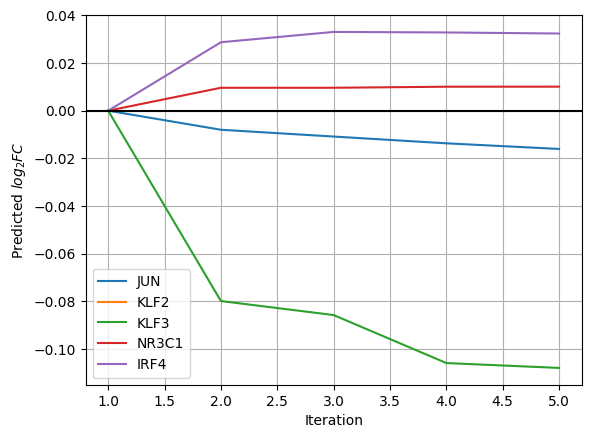

In [33]:
# Set the file path for saving the plot
output_path = os.path.join(PATH_ANALYSIS_OUTPUT, "Donwstream_Genes_After_disruption", f"{FT_OF_INTEREST}_perturbation_effect_in_{GROUP_OF_INTEREST}cluster.pdf")


genes_to_show = gene_to_TF[FT_OF_INTEREST]
cell_line = GROUP_OF_INTEREST
fig, ax = plt.subplots()
baseline = perturbation_over_iter[0].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, genes_to_show]
for gene in genes_to_show:
    ax.plot(
        np.arange(5) + 1,
        [
            np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
            for i in np.arange(5) + 1
        ],
        label = gene
    )
ax.set_ylabel("Predicted $log{_2}FC$")
ax.set_xlabel("Iteration")
ax.legend()
ax.axhline(y = 0, color = "black")
ax.grid("gray")
ax.set_axisbelow(True)

# Save the plot to the specified file path
plt.savefig(output_path, format='pdf')

2024-11-14 21:30:28,107 Perturbation INFO     Generating ranking based on perturbed matrix.
2024-11-14 21:32:52,000 Perturbation INFO     Scoring eRegulons.
2024-11-14 21:33:18,519 Perturbation INFO     Projecting perturbation effect in embedding


/opt/conda/lib/python3.11/site-packages/scenicplus/simulation.py:232: RuntimeWarning: invalid value encountered in divide
  unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)  # divide by L2


2024-11-14 22:46:30,841 Perturbation INFO     Calculating grid of arrows
2024-11-14 22:46:30,974 Perturbation INFO     Plotting


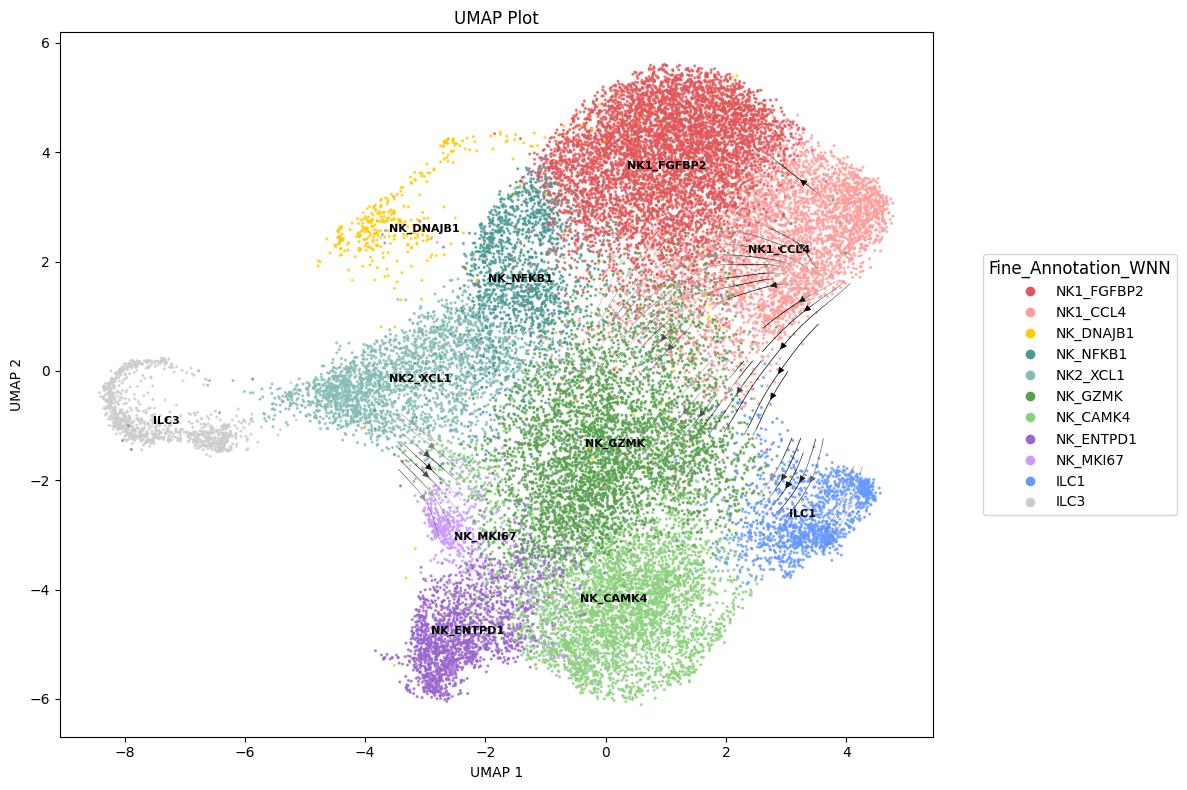

In [34]:
# Create color dictionary
color_dict_line = dict(zip(cluster_names, color_codes))

# Set the file path for saving the plot
output_path = os.path.join(PATH_ANALYSIS_OUTPUT, "Disrupted_heatmap", f"{FT_OF_INTEREST}_perturbation_effect.pdf")


def plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line, point_size= 1.5, legend_loc='center left'):
    texts = []
    
    # Plot UMAP
    scatter = ax.scatter(
        eRegulon_gene_AUC.obsm["X_umap"][:, 0],
        eRegulon_gene_AUC.obsm["X_umap"][:, 1],
        c=[color_dict_line.get(line, "#000000") for line in eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]],
        s=point_size,
        alpha=0.7
    )
    
    # Plot labels
    for line in set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME]):
        line_bc_idc = np.where(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME] == line)[0]
        avg_x, avg_y = eRegulon_gene_AUC.obsm["X_umap"][line_bc_idc, 0:2].mean(0)
        texts.append(
            ax.text(
                avg_x,
                avg_y,
                line,
                fontweight="bold",
                fontsize=8
            )
        )
    
    # Adjust text labels to avoid overlap
    adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=color_dict_line[line], markersize=8, label=line)
                       for line in color_dict_line if line in set(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])]
    ax.legend(handles=legend_elements, loc=legend_loc, bbox_to_anchor=(1.05, 0.5), 
              title=CELL_TYPE_COLNAME, title_fontsize='large')
    
    # Set labels and title
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_title('UMAP Plot')
    
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    return ax

# Usage
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)

# Umap Dataviz
plot_perturbation_effect_in_embedding(
    perturbed_matrix = perturbation_over_iter[5],
    original_matrix = perturbation_over_iter[0],
    embedding = eRegulon_gene_AUC.obsm["X_umap"][:, 0:2],
    AUC_kwargs = {},
    ax = ax,
    eRegulons = pd.concat(
        [
            scplus_mdata.uns["direct_e_regulon_metadata"],
            scplus_mdata.uns["extended_e_regulon_metadata"]
        ]
    ),
    n_cpu = NUMBER_CPU
)

# Save the plot to the specified file path
plt.savefig(output_path, format='pdf')